<a href="https://colab.research.google.com/github/enjileona/Bootcamp-Data-Science-and-Mechine-Learning/blob/main/Exercise_Exploring_Mechine_Learning_Decision%20Tree%20dan%20KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#CASE STUDY

Saya diberi dataset credit_score_classification.csv yang berisi informasi nasabah. Tugas saya adalah membuat model Machine Learning yang mampu membantu proses identifikasi risiko kredit dari nasabah tersebut. Saya memilih mencoba dua model yaitu **Decision Tree dan KNN**.

## TASK
1. **Persiapan Notebook**
2. **Data Checking & EDA** (Exploratory Data Analysis)
3. **Data Preprocessing**
4. **Model Development**: Decision Tree dan KNN
5. **Model Evaluation**

# Exercise Exploring Mechine Learning Part I


# 1. Persiapan Notebook

## Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

## Loading Dataset

In [ ]:
URL_DATA = 'https://drive.google.com/uc?id=1vy1_i7CuSlaAbWlCQLLjFI_k1L7RdwBV'

df  = pd.read_csv(URL_DATA)

df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


- checking_balance: Customer's current account balance in deutschmarks, classified as < 0 DM (negative balance), 1 - 200 DM, > 200 DM, or unknown (unknown).
- months_loan_duration: Duration of the loan in months.
- credit_history: Credit history of the applicant.
- purpose: Purpose of the loan.
- amount: Loan amount.
- savings_balance: Savings account balance.
- employment_duration: Length of employment.
- percent_of_income: Percentage of income allocated to loan repayment.
- years_at_residence: Years at the current residence.
- age: Applicant's age.
- other_credit: Presence of other credit agreements.
- housing: Housing status (e.g., rent, own).
- existing_loans_count: Number of existing loans.
- job: Job type or classification.
- dependents: Number of dependents.
- phone: Availability of a telephone.
- default: Target variable indicating loan default ("yes" or "no").



# 2. DATA Checking & EDA (Exploratory Daya Analysis)

## **Cek Kualitas Data**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

## **Ringkasan Statistik**

In [ ]:
df.describe(include="all")

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
count,1000,1000.000000,1000,1000,1000.000000,1000,1000,1000.000000,1000.000000,1000.000000,1000,1000,1000.000000,1000,1000.000000,1000,1000
unique,4,NaN,5,6,NaN,5,5,NaN,NaN,NaN,3,3,NaN,4,NaN,2,2
top,unknown,NaN,good,furniture/appliances,NaN,< 100 DM,1 - 4 years,NaN,NaN,NaN,none,own,NaN,skilled,NaN,no,no
freq,394,NaN,530,473,NaN,603,339,NaN,NaN,NaN,814,713,NaN,630,NaN,596,700
mean,NaN,20.903000,NaN,NaN,3271.258000,NaN,NaN,2.973000,2.845000,35.546000,NaN,NaN,1.407000,NaN,1.155000,NaN,NaN
std,NaN,12.058814,NaN,NaN,2822.736876,NaN,NaN,1.118715,1.103718,11.375469,NaN,NaN,0.577654,NaN,0.362086,NaN,NaN
min,NaN,4.000000,NaN,NaN,250.000000,NaN,NaN,1.000000,1.000000,19.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
25%,NaN,12.000000,NaN,NaN,1365.500000,NaN,NaN,2.000000,2.000000,27.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
50%,NaN,18.000000,NaN,NaN,2319.500000,NaN,NaN,3.000000,3.000000,33.000000,NaN,NaN,1.000000,NaN,1.000000,NaN,NaN
75%,NaN,24.000000,NaN,NaN,3972.250000,NaN,NaN,4.000000,4.000000,42.000000,NaN,NaN,2.000000,NaN,1.000000,NaN,NaN


## **Univariate Analysis dan Multivariate Analysis**

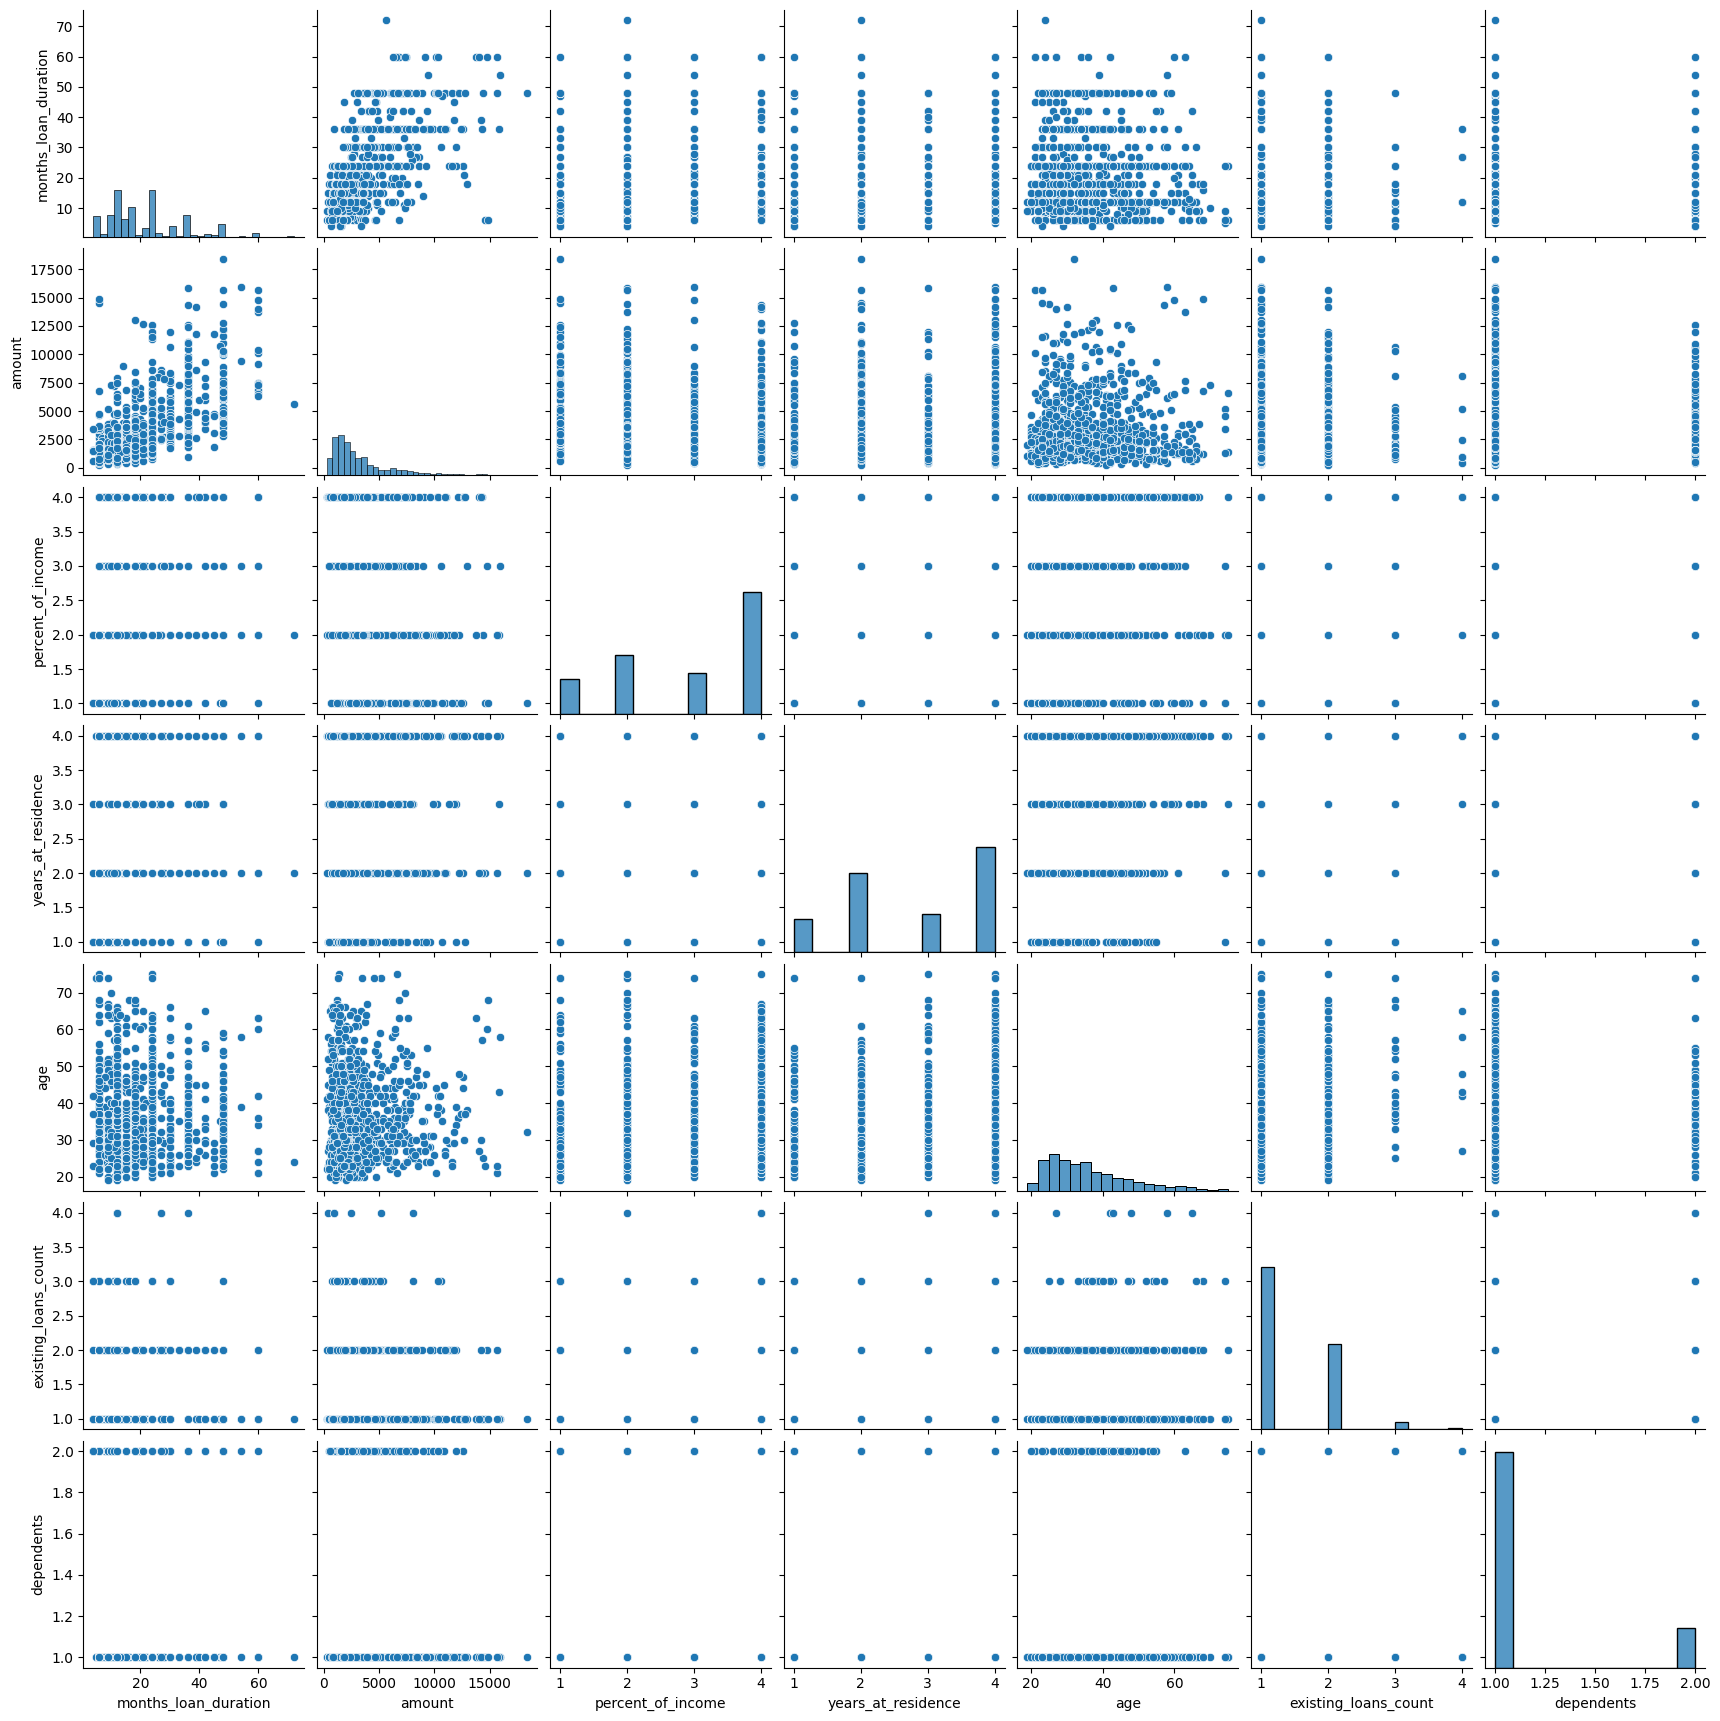

In [ ]:
sns.pairplot(df.select_dtypes(include=np.number))
plt.show()

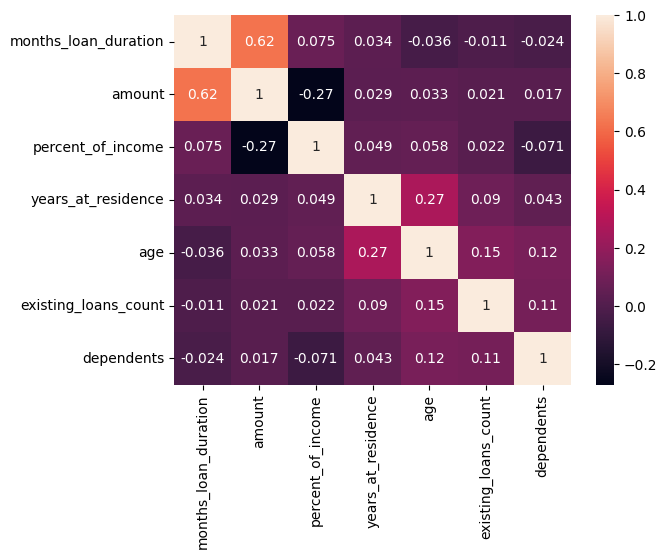

In [ ]:
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True)
plt.show()

Korelasi tertinggi terdapat antara durasi pinjaman dan jumlah pinjaman (r=0.62) yang menunjukkan hubungan logis antara lamanya pinjaman dan besarnya kredit yang diajukan.
Sementara variabel lain menunjukkan korelasi lemah, menandakan bahwa data cukup seimbang dan dapat memberikan kontribusi berbeda dalam model prediksi risiko kredit.

# 3. Data Preprocessing

## **Tangani Missing Value**

In [ ]:
df.isnull().sum()

#Tidak ditemukan missing value

,0
checking_balance,0
months_loan_duration,0
credit_history,0
purpose,0
amount,0
savings_balance,0
employment_duration,0
percent_of_income,0
years_at_residence,0
age,0


Pisahkan fitur dan target
- X berisi semua fitur (input) kecuali kolom default.
- y berisi target output (apakah nasabah default atau tidak).

In [ ]:
X = df.drop('default', axis=1)
y = df['default']

# **Identifikasi kolom numerik dan kategorikal**

In [ ]:
numerical_cols = ["months_loan_duration", "amount", "age"]
categorical_cols = X.select_dtypes(include='object').columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['months_loan_duration', 'amount', 'age']
Categorical columns: ['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone']


Bagi dataset menjadi data latih dan data uji

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# **Feature Scalling (standarisasi data)**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled_numerical = scaler.transform(X_test[numerical_cols])

X_train_processed = X_train.copy()
X_test_processed = X_test.copy()

X_train_processed[numerical_cols] = X_train_scaled_numerical
X_test_processed[numerical_cols] = X_test_scaled_numerical

In [ ]:
X_train

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
29,< 0 DM,60,poor,business,6836,< 100 DM,> 7 years,3,4,63,none,own,2,skilled,1,yes
535,> 200 DM,21,critical,education,2319,< 100 DM,< 1 year,2,1,33,none,rent,1,skilled,1,no
695,unknown,6,good,car,1236,500 - 1000 DM,1 - 4 years,2,4,50,none,rent,1,skilled,1,no
557,unknown,21,perfect,car,5003,unknown,1 - 4 years,1,4,29,bank,own,2,skilled,1,yes
836,unknown,12,good,furniture/appliances,886,unknown,1 - 4 years,4,2,21,none,own,1,skilled,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,unknown,18,very good,car,6458,< 100 DM,> 7 years,2,4,39,bank,own,2,management,2,yes
270,unknown,18,good,car,2662,unknown,4 - 7 years,4,3,32,none,own,1,skilled,1,no
860,unknown,24,critical,car,5804,> 1000 DM,1 - 4 years,4,2,27,none,own,2,skilled,1,no
435,1 - 200 DM,12,good,furniture/appliances,1484,unknown,1 - 4 years,2,1,25,none,own,1,skilled,1,yes


In [ ]:
X_test_processed.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,-0.081357,-0.154264,3.005000,2.840000,-0.005590,1.390000,1.200000
std,1.103386,0.853749,1.105025,1.100206,0.987163,0.574062,0.401004
min,-1.448750,-1.064997,1.000000,1.000000,-1.364270,1.000000,1.000000
25%,-0.770774,-0.714213,2.000000,2.000000,-0.750474,1.000000,1.000000
50%,-0.262292,-0.392775,3.000000,3.000000,-0.224364,1.000000,1.000000
75%,0.246190,0.057876,4.000000,4.000000,0.499038,2.000000,1.000000
max,4.314045,3.982713,4.000000,4.000000,2.844613,4.000000,2.000000


# **Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    X_train_processed[col] = le.fit_transform(X_train[col])
    X_test_processed[col] = le.transform(X_test[col])
    label_encoders[col] = le

In [ ]:
label_encoders["purpose"].classes_

array(['business', 'car', 'car0', 'education', 'furniture/appliances',
       'renovations'], dtype=object)

In [ ]:
X_test_processed

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone
521,1,-0.262292,1,4,-0.058908,2,0,2,2,-1.013530,1,1,1,1,1,0
737,1,-0.262292,1,1,0.351952,0,0,3,4,-0.048994,1,1,1,3,2,1
740,1,0.246190,4,1,-0.357558,0,1,2,3,-0.312049,0,1,1,1,1,0
660,2,-0.770774,1,4,-0.712486,2,0,3,4,-1.101215,1,2,1,1,1,0
411,3,1.008913,0,1,1.343886,2,1,3,2,-0.048994,1,1,2,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
408,3,0.246190,1,4,-0.043371,1,3,3,2,-0.838159,1,1,1,0,1,1
332,0,3.297082,1,1,1.397401,0,2,4,2,-1.013530,1,1,1,0,1,0
208,1,0.246190,1,0,1.107382,2,0,2,2,-1.276585,2,1,1,3,1,0
613,1,0.246190,4,1,0.093697,2,0,1,4,-1.188900,0,2,1,1,1,0


# 4. Model Development dan Model Evaluation

## **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_processed, y_train)

DecisionTreeClassifier()

Evaluasi Data Training

In [ ]:
y_pred_train_dt = dt_model.predict(X_train_processed)

print("Classification Report (Test):\n", classification_report(y_train, y_pred_train_dt))

Classification Report (Test):
               precision    recall  f1-score   support

          no       1.00      1.00      1.00       559
         yes       1.00      1.00      1.00       241

    accuracy                           1.00       800
   macro avg       1.00      1.00      1.00       800
weighted avg       1.00      1.00      1.00       800



Evaluasi Data Testing

In [ ]:
y_pred_dt = dt_model.predict(X_test_processed)

print("Classification Report (Test):\n", classification_report(y_test, y_pred_dt))

Classification Report (Test):
               precision    recall  f1-score   support

          no       0.80      0.80      0.80       141
         yes       0.52      0.51      0.51        59

    accuracy                           0.71       200
   macro avg       0.66      0.65      0.66       200
weighted avg       0.71      0.71      0.71       200



## **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=15)
knn_model.fit(X_train_processed, y_train)

KNeighborsClassifier(n_neighbors=15)

Prediksi dan Evaluasi Model

In [ ]:
y_pred_knn = knn_model.predict(X_test_processed)

print("Classification Report (Test):\n", classification_report(y_test, y_pred_knn))

Classification Report (Test):
               precision    recall  f1-score   support

          no       0.78      0.93      0.85       141
         yes       0.69      0.37      0.48        59

    accuracy                           0.77       200
   macro avg       0.73      0.65      0.67       200
weighted avg       0.75      0.77      0.74       200



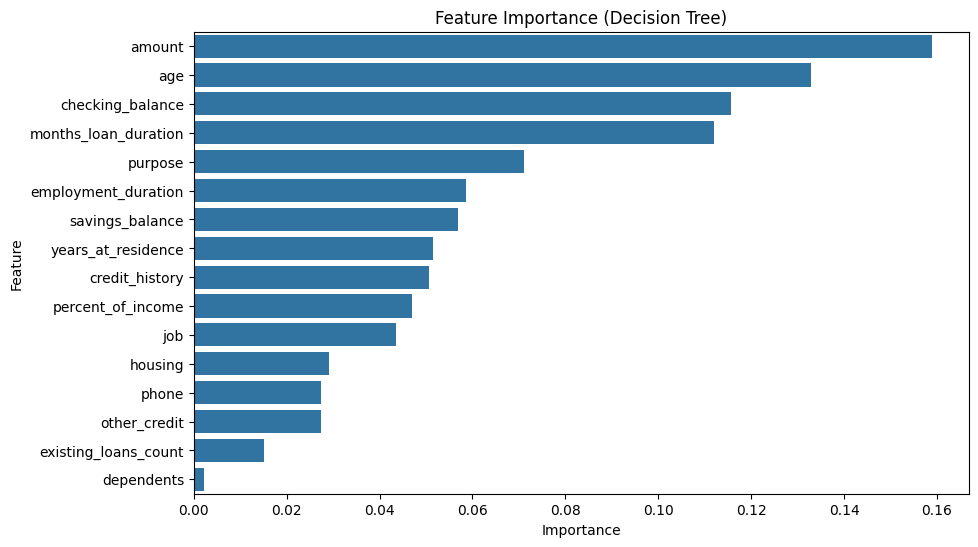

In [ ]:
# Get feature importance
importances = dt_model.feature_importances_
feature_importance_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feature_importance_df)
plt.title("Feature Importance (Decision Tree)")
plt.show()


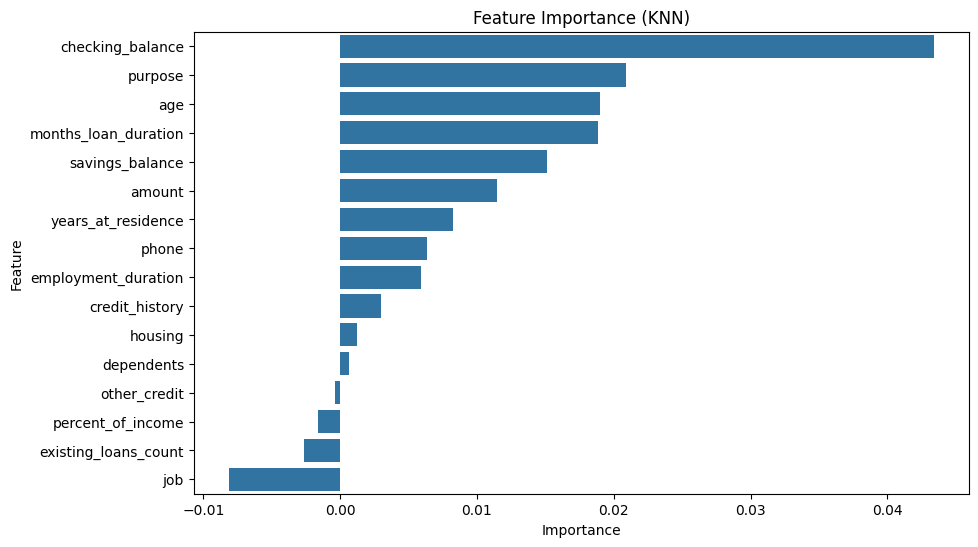

In [ ]:
from sklearn.inspection import permutation_importance
result = permutation_importance(knn_model, X_train_processed, y_train, n_repeats=10, random_state=42)

importance_df = pd.DataFrame({
    "Feature": X_test.columns,
    "Importance": result.importances_mean
}).sort_values(by="Importance", ascending=False)


plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importance (KNN)")
plt.show()


Evaluasi berdasarkan metrik
* Accuracy: KNN lebih tinggi (77%), artinya prediksi keseluruhan lebih baik
* Precision: KNN memiliki precision lebih tinggi
* Recall: Kedua model lemah di kelas default karena data imbalanced
* F1- Score: KNN lebih baik artinya model lebih seimbang antara presisi dan sensitivitas

Berdasarkan Analisis Feature Importance
*  Decision Tree lebih sering menggunakan fitur amount (jumlah pinjaman) dalam pengambilan keputusan. Hal ini menunjukkan bahwa besarnya jumlah pinjaman merupakan indikator penting dalam membedakan nasabah yang berisiko gagal bayar.  
*   KNN lebih banyak mengandalkan checking balance dan purpose sebagai pembeda utama antar nasabah dalam pengambilan keputusan. Kondisi saldo rekening dan tujuan pinjaman menjadi faktor paling menentukan dalam menilai kemiripan profil nasabah terhadap kelompok default maupun non-default.





**Kesimpulan:**
Model Decision Tree lebih sesuai digunakan dalam bisnis karena mampu mendeteksi nasabah berisiko gagal bayar dengan lebih baik dan memberikan interpretasi yang mudah dipahami untuk pengambilan keputusan manajerial.
Sementara itu, KNN memiliki akurasi yang lebih tinggi namun kurang transparan, sehingga lebih cocok digunakan sebagai model pendukung untuk validasi hasil prediksi.